# The Iris-dataset

The irisdataset is a well known dataset when experimenting with machine learning in general. It's also very well suited to show how unsupervised learning could work.

## Data import

The Iris-dataset is available from sklearn. As all datasets in sklearn it's already separated into features and target. Because we are not interested in a particular target (we're not doing supervised learning anymore) we'll combine them into on single pandas dataframe.


In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data      # Features
y = iris.target    # Labels
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(iris.data, columns=[i.replace(' ', '_').replace('(', '').replace(')', '') for i in iris.feature_names])
df['target'] = iris.target
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data exploration

In an ideal world we'd now make a graph of all four numerical features, but that is impossible. Lets do sepal and petal length in stead.

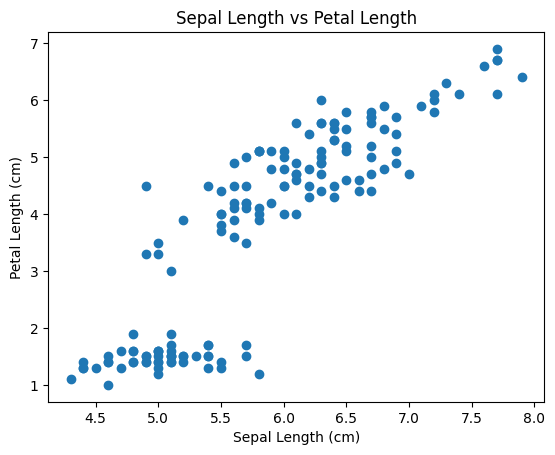

In [2]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal_length_cm'], df['petal_length_cm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
plt.show()

## 2D model

We'll begin with a 2D-model, creating a logical grouping of sepal length and petal length. Create a new dataframe that only has these columns, and store the results in an extra column of that dataset.

In [3]:
#DELETE
from sklearn.cluster import KMeans

df_length = df[['sepal_length_cm', 'petal_length_cm']].copy()

model = KMeans(n_clusters=2, random_state=42)
model.fit(df_length)

df_length['cluster'] = model.labels_

df_length.head()

,sepal_length_cm,petal_length_cm,cluster
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1
3,4.6,1.5,1
4,5.0,1.4,1


Now redraw the previous graph, changing the color of the dots by the cluster our model predicted.

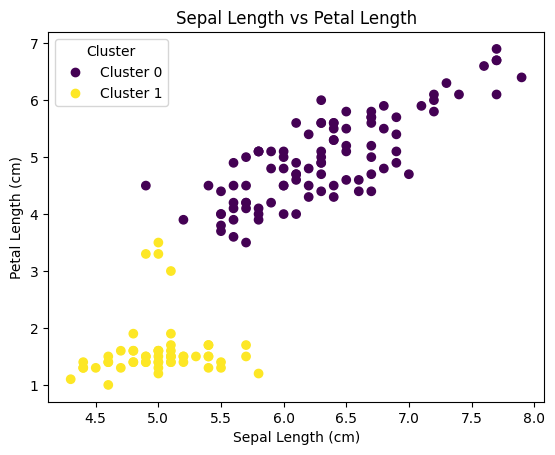

In [4]:
#DELETE
scatter = plt.scatter(df_length['sepal_length_cm'], df_length['petal_length_cm'], c=df_length['cluster'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')
# Add legend for clusters
legend_labels = [f'Cluster {i}' for i in sorted(df_length['cluster'].unique())]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Cluster")
plt.show()

KMeans clustering works by determining a center point and selecting all datapoints closest to this datapoint. Show which the centerpoints were in our model.

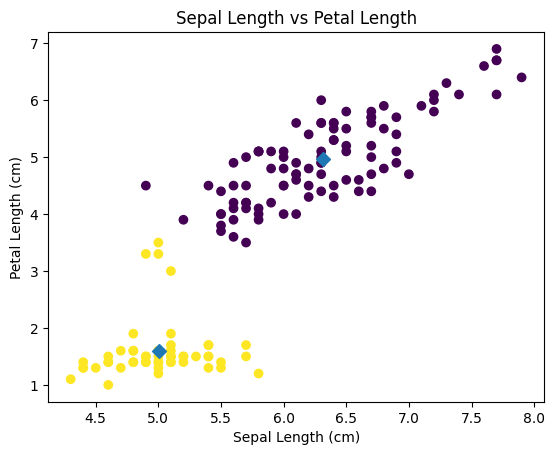

In [5]:
#DELETE

plt.scatter(df_length['sepal_length_cm'], df_length['petal_length_cm'], c=df_length['cluster'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')


centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


## 2D inference

Let's give the model two new datapoints.

```Python
points = [ [6,2], [7, 3.5] ]
```

In [6]:
points = [ [6,2], [7, 3.5] ]
new_label = model.predict(points)
new_label

c:\Scripts\Cello_AI\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1, 0], dtype=int32)

Some problems, but good result.

First problem is the warning. We didn't provide a dataframe as we should have but a simple list of lists. The model transformed it, but gave a warning that he assumed the feature names.

Second problem is that the output is a list of two numbers. When looking at the data on which we trained the model we can see that this is indeed correct: the yellow dots were group 1, the purple dots were group 0. Inference was, therefore, correct.

## Another 2D-model

What if we were to use the same data, but create a model that split this data into four groups. Would that seem equally logic?

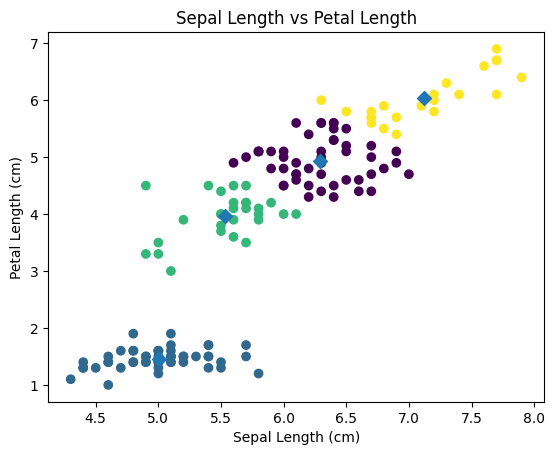

In [7]:
#DELETE
from sklearn.cluster import KMeans

df_length = df[['sepal_length_cm', 'petal_length_cm']].copy()

model = KMeans(n_clusters=4, random_state=42)
model.fit(df_length)

df_length['cluster'] = model.labels_

plt.scatter(df_length['sepal_length_cm'], df_length['petal_length_cm'], c=df_length['cluster'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Sepal Length vs Petal Length')


centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


Strangely enough, it kind of does make sense.

## Full model

Let's build a new model, but this time using the original dataset of 4 features (not only using length as before, but also width). Split into 3 clusters.

In [8]:
#DELETE
model_full = KMeans(n_clusters=3, random_state=42)
model_full.fit(df[ ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'] ])
df['cluster_predict'] = model_full.labels_
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target,cluster_predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


Comparing the actual cluster values and our predicted cluster values can be done using crosstabulation.

In [9]:
#DELETE
pd.crosstab(df['target'], df['cluster_predict'], rownames=['actual'], colnames=['predicted'])

predicted,0,1,2
actual,,,
0,0,50,0
1,3,0,47
2,36,0,14


This looks like a very complicated graph because "0" in the predictions isn't "0" in the actual data. Let's remap this.

In [10]:
#DELETE
df["cluster_predict"] = df["cluster_predict"].map({0: 2, 1: 0, 2: 1})
pd.crosstab(df['target'], df['cluster_predict'], rownames=['actual'], colnames=['predicted'])

predicted,0,1,2
actual,,,
0,50,0,0
1,0,47,3
2,0,14,36


## Cluster evaluation

Build the iris-model with anything 2 and 20 clusters and plot the resulting inertia.

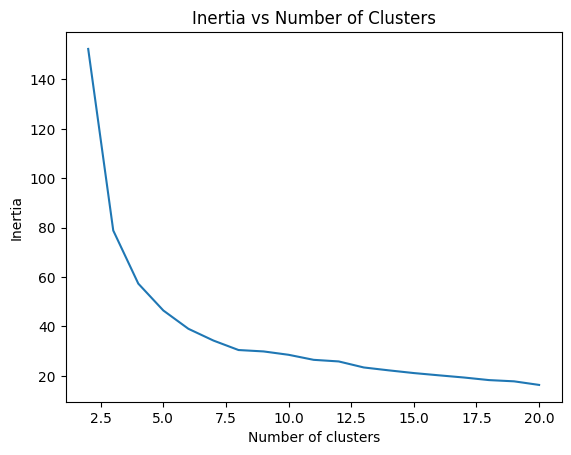

In [11]:
#DELETE
inertias = []
for i in range(2,21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df[ ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'] ])
    inertias.append(model.inertia_)
plt.plot(range(2,21), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()

The elbow is clearly closer to 7 than the 3 we used before. Rebuild that model and do anothed crosstab!

In [12]:
#DELETE
model_full = KMeans(n_clusters=7, random_state=42)
model_full.fit(df[ ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'] ])
df['cluster_predict_7'] = model_full.labels_
df.head()

pd.crosstab(df['target'], df['cluster_predict_7'], rownames=['actual'], colnames=['predicted'])

predicted,0,1,2,3,4,5,6
actual,,,,,,,
0,0,28,0,0,0,22,0
1,21,0,26,0,3,0,0
2,0,0,1,12,15,0,22


Remapping is quite difficult now, but...

| Predicted | Actual | Nr wrong |
|----|----| ----|
|0| class 1|0|
|1| class 0|0|
|2| class 1|1|
|3| class 2|0|
|4| class 2|3|
|5| class 0|0|
|6| class 2|0|

In total we only misdiagnosed 4 flowers, vs 17 when only using 3 clusters.